Импорт необходимых библиотек

In [2]:
import bb_getter.bb_getter2 as bbox_getter
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Вспомогательная функция для визуализации результатов

In [3]:
def show_bboxes(NAME, bboxes):
    image_original = cv2.imread(NAME)
    new_rect_rotated = np.zeros_like(image_original)
    colors = [(0,255,0), (255, 0, 0), (0,0,255)]
    i = 0

    for bbox in bboxes:
        p1,p2,p3,p4 = bbox
        new_rect_rotated = cv2.circle(new_rect_rotated, p1,2, colors[i], 30)
        new_rect_rotated = cv2.circle(new_rect_rotated, p2,2, colors[i], 30)
        new_rect_rotated = cv2.circle(new_rect_rotated, p3,2, colors[i], 30)
        new_rect_rotated = cv2.circle(new_rect_rotated, p4,2, colors[i], 30)
        i = (i+1)%3
        
    final  = cv2.addWeighted(image_original,1,new_rect_rotated,1,0)
    final = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
    plt.imshow(final)

Анализ одной картинки

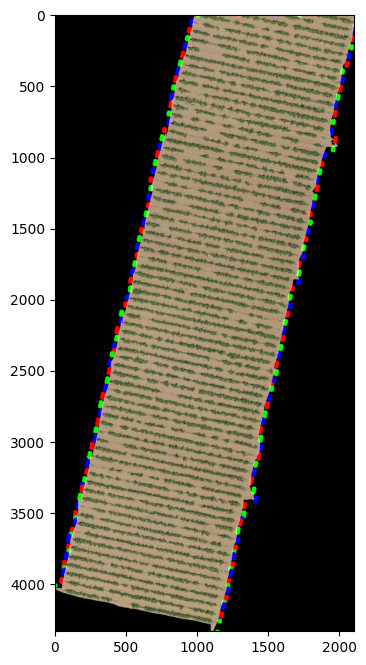

In [4]:
NAME = "examples/example_1.jpg"
save_path = "debug"

bboxes = bbox_getter.get_bb(NAME, intensity = "keypoints", smooth = False, save_path=save_path, verbose=0)
show_bboxes(NAME, bboxes)

Анализ всех картинок из папки

In [ ]:
PATH = "examples"
save_path = "debug"

for name in sorted(os.listdir(PATH)):
    print(f"Analysing {name}")
    bboxes = bbox_getter.get_bb(f"{PATH}/{name}", intensity = "keypoints", smooth = False, save_path=save_path, verbose=0)